<div class='alert alert-info'>
    <h1 align="center">Gradient Descent Algorithm</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Introduction

Gradient Descent is an optimization algorithm used to minimize the cost function in various machine learning models, including linear regression. In linear regression, the goal is to find the best-fitting line that minimizes the difference between the predicted values and the actual target values.

Gradient descent is an iterative optimization algorithm used to minimize a cost function by adjusting the parameters of a model. In the context of linear regression, the cost function measures the difference between the predicted values of the dependent variable and the actual values in the training dataset. The goal of gradient descent is to find the values of the model parameters that minimize this cost function and provide the best fit to the training data.

Here's how the gradient descent algorithm works:

1. **Initialization**: Start with an initial guess for the model parameters (e.g., intercept and slope).

2. **Compute Gradient**: Calculate the gradient of the cost function with respect to each model parameter. The gradient indicates the direction and magnitude of the steepest increase in the cost function. In the context of linear regression, the gradient is calculated using partial derivatives.

    $\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_i (y_i - (b + w X_i))$
        
    $\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_i (y_i - (b + w X_i)) X_i $ <br>
    
        
3. **Update Parameters**: Adjust the parameters in the direction opposite to the gradient to move towards the minimum of the cost function. This adjustment is done by multiplying the gradient by a small number called the `learning rate` and subtracting it from the current parameter values. The learning rate determines the size of the steps taken in parameter space and affects the convergence of the algorithm. The learning rate $\alpha$ is crucial for the convergence of the algorithm. If it's too small, the algorithm may take a long time to converge. On the other hand, if it's too large, the algorithm may oscillate and fail to find the minimum.

    $b = b - \alpha \frac{\partial J}{\partial b}$

    $w = w - \alpha \frac{\partial J}{\partial w}$ <br>
    
4. **Compute cost funciton** 
    
    $ J = \frac{1}{2m} \sum (y - \hat{y})^2 $ <br>


5. **Check for convergence**: Repeat steps 3 and 4 until convergence criteria are met. Convergence is typically determined based on the change in the cost function or the parameter values between iterations.

Gradient descent can follow different variants, such as batch gradient descent, stochastic gradient descent, and mini-batch gradient descent, depending on how the training data is used to compute the gradient and update the parameters. Each variant has its advantages and disadvantages in terms of convergence speed, computational efficiency, and sensitivity to the learning rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

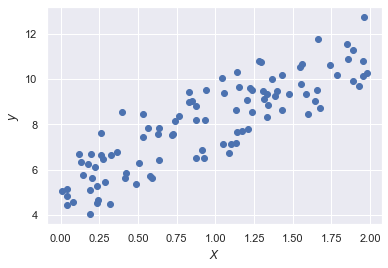

In [2]:
np.random.seed(0)  # for reproducibility

# Generate some random data between 0 and 2
X = 2 * np.random.rand(100,1)

# Generate target values using a linear relationship with some added random noise
y = 5 + 3 * X + np.random.randn(100,1)

plt.plot(X, y, 'o')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

Let's write a function to calculate the gradients of the cost function with respect to the parameters b and w for linear regression.

In [3]:
def compute_gradient(X, y, b, w):
    """
    Computes the gradient for linear regression
    
    Inputs:
        - X (ndarray): shape (m,) variable such as house size
        - y (ndarray): shape (m,) target value
        - b (scallar):            initial values of the parameter
        - w (scallar):            initial values of the parameter
        
    Returns:
        - dj_db (scallar): the gradient of the cost with respet to the parameter b
        - dj_dw (scallar): the gradient of the cost with respet to the parameter w
    """

    # Compute predictions
    predictions = b + w * X
    
    # Compute gradients using vectorized operations
    dj_db = np.mean(predictions - y)
    dj_dw = np.mean((predictions - y) * X)
    
    return dj_db, dj_dw

The following function will take the input data (X and y), initial parameter values (b and w), learning rate (alpha), stopping threshold (e), and maXimum number of iterations (iteration) as arguments. It will return the optimized parameters b and w, as well as the history of parameter values and cost function values throughout the iterations.

In [4]:
def GD(X, y, alpha=0.01, e=1e-6, iteration=5000):
    """
    Perform gradient descent for linear regression.
    
    Inputs:
        - X (ndarray): Independent variable values.
        - y (ndarray): Dependent variable values.
        - alpha (float): Learning rate.
        - e (float): Stopping threshold for change in cost function.
        - iteration (int): Maximum number of iterations.
    
    Returns:
        - b_opt (float): Optimized intercept parameter.
        - w_opt (float): Optimized slope parameter.
        - log (ndarray): History of parameter values.
        - cost_log (ndarray): History of cost function values.
    """
    m, n = X.shape  # Number of data points and features
    
    # Initialize arrays to store parameter and cost function values
    log = np.zeros((iteration, 2))
    cost_log = np.zeros(iteration)
    
    # 1- Initialize parameters
    b = 0
    w = np.zeros(n)
    
    # Store initial parameter values
    log[0, 0] = b
    log[0, 1] = w
    
    # Compute initial cost function value
    cost_log[0] = 1 / (2 * m) * np.sum((y - (b + w * X))**2)
    
    # Gradient descent loop
    for i in range(1, iteration):
        
        # 2- Compute gradients
        dj_db, dj_dw = compute_gradient(X, y, log[i-1, 0], log[i-1, 1])
        
        # 3- Update parameters
        log[i, 0] = log[i-1, 0] - (alpha * dj_db)
        log[i, 1] = log[i-1, 1] - (alpha * dj_dw)
        
        # 4- Compute cost function value
        cost_log[i] = 1 / (2 * m) * np.sum(((log[i, 0] + log[i, 1] * X) - y)**2)
        
        # 5- Check for convergence
        if abs(cost_log[i] - cost_log[i-1]) <= e:
            print('Converged after', i, 'iterations')
            break
    
    # Extract optimized parameters
    b_opt = log[i, 0]
    w_opt = log[i, 1]
    J_opt = cost_log[i]
    
    return b_opt, w_opt, J_opt, log[:i+1], cost_log[:i+1]

In [5]:
b_opt, w_opt, J_opt, log, cost_log = GD(X, y, alpha=.01, e=1e-6, iteration=5000)

print('b: %.4f' %b_opt)
print('w: %.4f' %w_opt)
print('J: %.4f' %J_opt)

Converged after 2136 iterations
b: 5.1758
w: 3.0096
J: 0.4965


The following code creates a figure with two subplots to visualize the cost function values over iterations. The first subplot displays the entire range of iterations, while the second subplot focuses on a subset of iterations (starting from the 150th iteration).

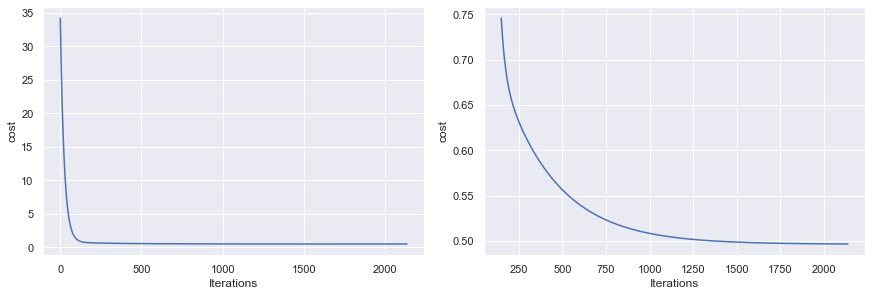

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4),
                               constrained_layout=True)

u = len(cost_log)

# plot cost versus iteration
ax1.plot(np.arange(u), cost_log)
ax1.set_ylabel('cost')
ax1.set_xlabel('Iterations')

# plot cost versus iteration that does not include the initial iterations
ax2.plot(np.arange(150,u),cost_log[150:u])
ax2.set_ylabel('cost')
ax2.set_xlabel('Iterations')

plt.show()

Also, we can generate a contour plot showing the progress of the gradient descent algorithm. Let's define a function for this purpose.

In [7]:
def plot_GD_progress(X, y, log):
    """
    Plot the progress of gradient descent algorithm on a contour plot.

    Parameters:
        - X (ndarray): Independent variable values.
        - y (ndarray): Dependent variable values.
        - log (ndarray): History of parameter values.

    Returns:
        - a countor plot with GD progress on it
    """
    m, n = X.shape

    # Define range for contour plot
    b_vals = np.linspace(0, 10, 50)
    w_vals = np.linspace(0, 10, 50)
    B, W = np.meshgrid(b_vals, w_vals)

    # Stack B and W matrices vertically to create a matrix of shape (2500, 2)
    BW = np.column_stack((B.ravel(), W.ravel()))

    # Compute Z (cost for each combination of B and W)
    Z = np.zeros_like(B)
    for i, (b, w) in enumerate(BW):
        Z.flat[i] = 1 / (2 * m) * np.sum((y - (b + w * X))**2)

    fig = plt.figure(figsize=(8, 6))

    # Plot contour lines of the cost function
    plt.contour(B, W, Z, cmap=plt.cm.rainbow, levels=np.arange(0, 50))

    # Plot trajectory of gradient descent
    plt.plot(log[:, 0], log[:, 1], marker='o', markersize=3,
             color='r', label='Gradient Descent Trajectory')

    plt.xlabel('Intercept (b)')
    plt.ylabel('Slope (w)')
    plt.title('Gradient Descent Progress on Contour Plot', size='large')
    plt.colorbar(label='Cost Function')
    plt.legend()
    plt.show()

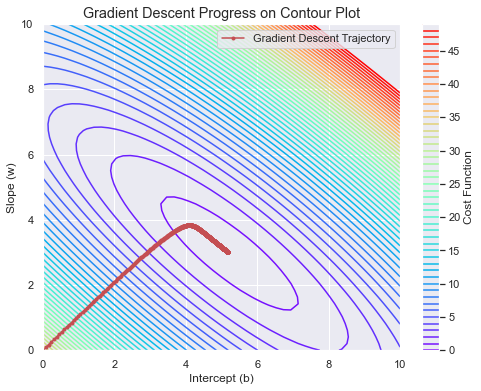

In [8]:
plot_GD_progress(X, y, log)

The learning rate plays a crucial role in determining the convergence and stability of the gradient descent algorithm. If the learning rate is too small, the algorithm may take a long time to converge to the optimal solution. On the other hand, if the learning rate is too large, the algorithm may overshoot the optimal solution or even diverge, leading to instability.

Here's what happens when the learning rate increases:

1. **Faster Convergence**: With a larger learning rate, the algorithm takes larger steps towards the optimal solution in each iteration, leading to faster convergence.

2. **Risk of Divergence**: However, if the learning rate is too large, the algorithm may overshoot the optimal solution and oscillate around it, or it may diverge completely.

3. **Loss of Precision**: Additionally, a large learning rate may cause the algorithm to miss fine details of the cost function landscape, leading to suboptimal solutions.

The range for the learning rate typically depends on the specific problem and the characteristics of the cost function. The learning rate can generally range from 0.0001 to 1, but it's essential to experiment with different values within this range to find the optimal learning rate for the problem at hand.

Let's increase the learning rate from 0.01 to 0.9 to see how this change affect the algorithm.

Converged after 54 iterations


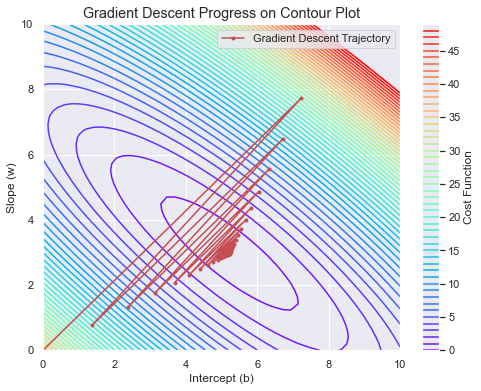

In [9]:
# Run GD algorithm with a large learning rate
b_opt, w_opt, J_opt, log, cost_log = GD(X, y, alpha=.9, e=1e-6, iteration=5000)

# plot the GD progress on a contour plot
plot_GD_progress(X, y, log)

The algorithm converged after only 54 iterations, but it overshoots the optimal solution and oscillate around it. In this example it did not complete;y diverge and could find the optimal solution.

Now, it's time to calculate the predicted values `y_pred` based on the optimized parameters b and w obtained from linear regression and plots the original data points along with the predicted line.

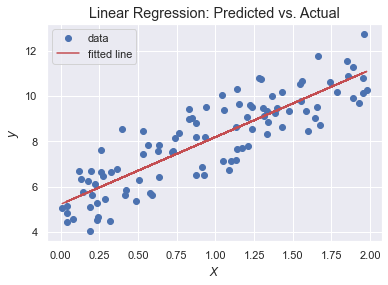

In [10]:
y_pred = np.zeros(X.shape)  # initialize array y_pred

# Calculate the predicted values
y_pred = b_opt + w_opt * X

plt.plot(X, y,'o', label='data') # plot the points

plt.plot(X, y_pred, label='fitted line', c="r") # plot the predicted line

plt.title("Linear Regression: Predicted vs. Actual", fontsize='large')
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend()
plt.show()

# Other Variants of Gradient Descent Algorithm

As we saw above, in batch gradient descent, the algorithm computes the gradient of the cost function with respect to the parameters using the entire training dataset at each iteration. Batch gradient descent is guaranteed to converge to the global minimum of the cost function for convex functions, but it can be computationally expensive for large datasets because it requires processing the entire dataset in each iteration.

## Stochastic Gradient Descent

Stochastic gradient descent updates the parameters using only one training example (or a small subset) at each iteration.
It computes the gradient of the cost function with respect to the parameters for each training example and updates the parameters accordingly. Stochastic gradient descent is computationally more efficient and can be faster than batch gradient descent, especially for large datasets, but it may exhibit more oscillations and noisy convergence due to the random selection of training examples.

In [11]:
def stochastic_GD(X, y, alpha=0.01, e=1e-6, iteration=5000):
    """
    Stochastic gradient descent algorithm for linear regression.
    
    Inputs:
        - X (ndarray): Independent variable values.
        - y (ndarray): Dependent variable values.
        - alpha (float): Learning rate.
        - e (float): Stopping threshold for change in cost function.
        - iteration (int): Maximum number of iterations.
    
    Returns:
        - b_opt (float): Optimized intercept parameter.
        - w_opt (float): Optimized slope parameter.
        - log (ndarray): History of parameter values.
        - cost_log (ndarray): History of cost function values.
    """
    m, n = X.shape  # Number of data points and features
    
    # Initialize arrays to store parameter and cost function values
    log = np.zeros((iteration, 2))
    cost_log = np.zeros(iteration)
    
    # 1- Initialize parameters
    b = 0
    w = np.zeros(n)
    
    # Store initial parameter values
    log[0, 0] = b
    log[0, 1] = w
    
    # Compute initial cost function value
    cost_log[0] = 1 / (2 * m) * np.sum((y - (b + w * X))**2)
    
    # Gradient descent loop
    for i in range(1, iteration):
        
        # A random sample
        idx = np.random.randint(0, m)
        
        Xs = np.take(X, idx)
        ys = np.take(y, idx)
        
        # 2- Compute gradients
        dj_db, dj_dw = compute_gradient(Xs, ys, log[i-1, 0], log[i-1, 1])
        
        # 3- Update parameters
        log[i, 0] = log[i-1, 0] - (alpha * dj_db)
        log[i, 1] = log[i-1, 1] - (alpha * dj_dw)
        
        # 4- Compute cost function value
        cost_log[i] = 1 / (2 * m) * np.sum(((log[i, 0] + log[i, 1] * Xs) - ys)**2)
        
    # Extract optimized parameters
    b_opt = log[i, 0]
    w_opt = log[i, 1]
    J_opt = cost_log[i]
    
    return b_opt, w_opt, J_opt, log[:i+1], cost_log[:i+1]

In [12]:
b_opt, w_opt, J_opt, SGD_log, cost_log = stochastic_GD(X, y, alpha=0.01, e=1e-6, iteration=2000)

print('b: %.4f' %b_opt)
print('w: %.4f' %w_opt)
print('J: %.4f' %J_opt)

b: 5.1947
w: 3.0531
J: 0.0001


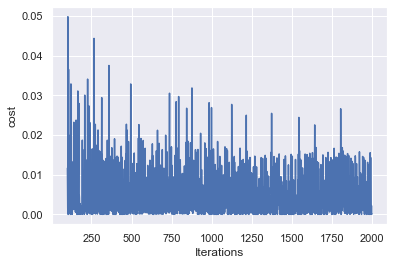

In [13]:
u = len(cost_log)

# plot cost versus iteration that does not include the initial iterations
plt.plot(np.arange(100,u),cost_log[100:u])
plt.ylabel('cost')
plt.xlabel('Iterations')

plt.show()

The cost function is not smootly decreasing anymore like the batch gradient dexcent algorithm.

## Mini-batch Gradient Descent
Mini-batch gradient descent combines the advantages of batch gradient descent and stochastic gradient descent by updating the parameters using a small random subset of the training data at each iteration.
It computes the gradient of the cost function with respect to the parameters for the mini-batch and updates the parameters accordingly. Mini-batch gradient descent offers a good compromise between the efficiency of stochastic gradient descent and the stability of batch gradient descent. It is commonly used in practice for training deep learning models and other large-scale machine learning tasks.

In [14]:
def minibatch_GD(X, y, batch_size=32, alpha=0.01, e=1e-6, iteration=5000):
    """
    Mini-batch gradient descent algorithm for linear regression.
    
    Inputs:
        - X (ndarray): Independent variable values.
        - y (ndarray): Dependent variable values.
        - batch_size: Size of mini-batches (default=32)
        - alpha (float): Learning rate.
        - e (float): Stopping threshold for change in cost function.
        - iteration (int): Maximum number of iterations.
    
    Returns:
        - b_opt (float): Optimized intercept parameter.
        - w_opt (float): Optimized slope parameter.
        - log (ndarray): History of parameter values.
        - cost_log (ndarray): History of cost function values.
    """
    m, n = X.shape  # Number of data points and features
    
    # Initialize arrays to store parameter and cost function values
    log = np.zeros((iteration, 2))
    cost_log = np.zeros(iteration)
    
    # 1- Initialize parameters
    b = 0
    w = np.zeros(n)
    
    # Store initial parameter values
    log[0, 0] = b
    log[0, 1] = w
    
    # Compute initial cost function value
    cost_log[0] = 1 / (2 * m) * np.sum((y - (b + w * X))**2)
    
    # Gradient descent loop
    for i in range(1, iteration):
        
        # A random sample
        idx = np.random.randint(0, m, batch_size)
        
        Xs = np.take(X, idx)
        ys = np.take(y, idx)
                
        # 2- Compute gradients
        dj_db, dj_dw = compute_gradient(Xs, ys, log[i-1, 0], log[i-1, 1])
        
        # 3- Update parameters
        log[i, 0] = log[i-1, 0] - (alpha * dj_db)
        log[i, 1] = log[i-1, 1] - (alpha * dj_dw)
        
        # 4- Compute cost function value
        cost_log[i] = 1 / (2 * m) * np.sum(((log[i, 0] + log[i, 1] * Xs) - ys)**2)
        
    # Extract optimized parameters
    b_opt = log[i, 0]
    w_opt = log[i, 1]
    J_opt = cost_log[i]
        
    return b_opt, w_opt, J_opt, log[:i+1], cost_log[:i+1]

In [15]:
b_opt, w_opt, J_opt, MBGD_log, cost_log = minibatch_GD(X, y, batch_size=10, alpha=0.01, e=1e-6, iteration=2000)

print('b: %.4f' %b_opt)
print('w: %.4f' %w_opt)
print('J: %.4f' %J_opt)

b: 5.1606
w: 2.9983
J: 0.0436


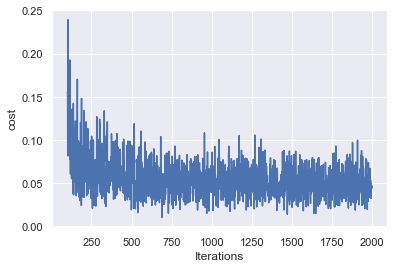

In [16]:
u = len(cost_log)

# plot cost versus iteration that does not include the initial iterations
plt.plot(np.arange(100,u),cost_log[100:u])
plt.ylabel('cost')
plt.xlabel('Iterations')

plt.show()

Both Mini-batch and Stochastic gradient descent are not guarenteed to minimize the cost function after each step because both have a degree of randomness built into them. Mini-bath randomly chooses which training examples to perform gradient descent on while Stochastic randomly chooses a single example.

Let's see how the progress of gradient descent algorithm looks like on the contour plots for Mini-batch and Stochastic gradient descent versions.

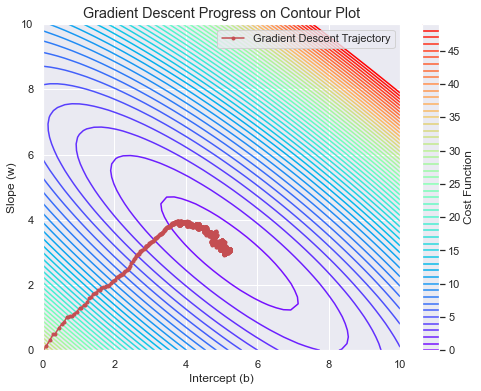

In [17]:
# Stochastic GD progress on a contour plot
plot_GD_progress(X, y, SGD_log)

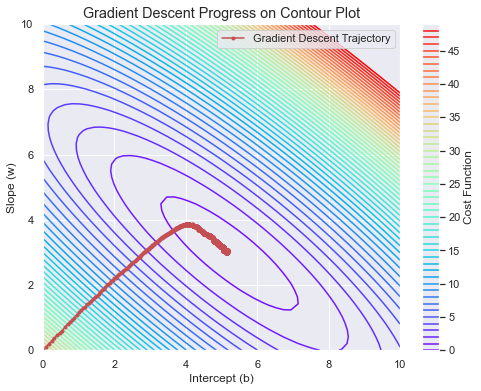

In [18]:
# Mini-Batch GD progress on a contour plot
plot_GD_progress(X, y, MBGD_log)